In [107]:
import pandas as pd

In [108]:
tables = pd.read_html('http://www.worldfootball.net/attendance/eng-premier-league-2017-2018/1/', header=0, index_col=0)

In [109]:
attendances = tables[1]

In [110]:
columns = ['Team', 'sum', 'Matches','Average']
attendances.drop('Team',1, inplace=True)
attendances.columns = columns
attendances = attendances.head(-1)
attendances = attendances.reset_index().drop('#',1)

In [111]:
attendances['Capacity'] = [75731,90000,60362,60000,55097,54074,52509,41837,40157,32689,32500,30750,30089,26445,26255,24500,22546,20750,22100,11464]

In [112]:
attendances['Sum_check'] = [1199359,1105664,1008171,853281,859684,903924,831057,704129,659857,504815,521424,516600,497098,425082,417673,384553,331637,329399,343612,180382]

In [114]:
attendances['Average_check'] = attendances['Sum_check']/attendances['Matches']
attendances['Percent_Full'] = (attendances['Average_check']/attendances['Capacity'])*100
attendances['Attendance_Rank'] = attendances.Percent_Full.rank(ascending=False)
attendances['Diff'] = attendances['Attendance_Rank'] - attendances['Actual_Rank']

## Which teams have the highest average attendance?

In [205]:
attendances[['Team', 'Percent_Full', 'Attendance_Rank']]

,Team,Percent_Full,Attendance_Rank
0,Manchester United,98.981840,3.0
1,Tottenham Hotspur,76.782222,20.0
2,Arsenal FC,98.247534,7.0
3,West Ham United,94.809000,13.0
4,Manchester City,97.519375,9.0
5,Liverpool FC,98.331916,6.0
6,Newcastle United,98.918400,4.0
7,Chelsea FC,99.001728,2.0
8,Everton FC,96.658410,11.0
9,Leicester City,96.518515,12.0


## Which Teams are the most under or over supported?

This looks at the average attendance percentage versus a teams position in the table and provides a way to see which teams:
 
 * perform very well in the league but have low attendences (under-supported); or
 * perform very poorly in the league but have high attendences (over-supported).

This analysis could be improved by also looking at the population of the city. But this gives us a good idea.

In [126]:
attendances['Actual_Rank'] = [2,4,6,15,1,3,10,5,9,8,18,13,19,16,20,14,7,17,12,11]
attendances.Actual_Rank = attendances.Actual_Rank.astype(float)

In [174]:
import numpy as np
attendances['color'] = np.where(attendances['Diff'] < 0, '#1abc9c', '#e74c3c')

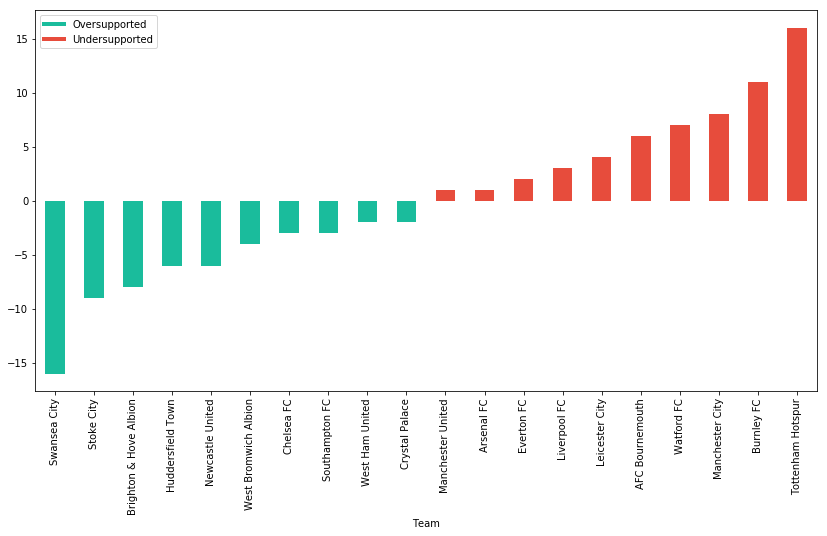

In [204]:
_a = attendances.set_index('Team').sort_values('Diff')
_a['Diff'].plot(kind='bar', color=_a['color'], figsize=(14,7))

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='#1abc9c', lw=4, label='Oversupported'),
                   Line2D([0], [0], color='#e74c3c', lw=4, label='Undersupported')]

plt.legend(handles=legend_elements, loc='best')

According to this analysis, Swansea City are the most over-supported team since they are performing poorly in the league table but have the best average attendance percentage in the league.

On the other hand, Tottenham Hotspur have a good league position but their attendance percentage is the worst in the league. This is largely because they are in Wembley whose capacity is 90000, but Spurs only manage to have around 76,000 supporters in the stadium.

In [ ]:
from bokeh.io import output_notebook
from bokeh.models import HoverTool, LabelSet
from bokeh.models.glyphs import Text
from bokeh.plotting import figure, show, ColumnDataSource

In [207]:
output_notebook()

Loading BokehJS ...

In [234]:
from bokeh.io import output_notebook
from bokeh.models import HoverTool, LabelSet
from bokeh.models.glyphs import Text
from bokeh.plotting import figure, show, ColumnDataSource

def project_cluster(df,x_col,y_col, label, mark_size=0.15):
    x = df[x_col]
    y = df[y_col]
    labels = [l for l in df[label].values]
    
    mark_size = [ms/20 for ms in df['Diff'].values]
    color = [color for color in df['color'].values]
    
    scale = 0.5

    source = ColumnDataSource(
            data=dict(
                x=x,
                y=y,
                color=color,
                mark_size=mark_size,
                labels=labels
            )
        )

    # Add author names and sizes to mouse-over info.
    hover = HoverTool(
            tooltips=[
            ("label", "@labels")
            ]
        )
    
    p = figure(tools=[hover, 'crosshair,pan,wheel_zoom,box_zoom,reset,save,lasso_select'],
              x_axis_label = x_col,
       y_axis_label = y_col)
    p.axis.visible= True
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    
    p.ray(x=[0], y=[0], length=100, angle=[46],
      angle_units="deg", color="#bdc3c7", line_width=2)
    
    p.scatter('x', 'y', source=source, fill_color='color', radius='mark_size', fill_alpha=1, line_color=None)
    
    labels = LabelSet(x='x', y='y', text='labels', level='glyph',
              x_offset=5, y_offset=-5, source=source, render_mode='canvas', text_font_size='8pt')
    
    p.add_layout(labels)
    show(p)

If teams performed as well as their attendance, we would have all the points arranged on a straight line, since league performance would translate to attendance.

In [235]:
project_cluster(attendances, 'Actual_Rank', 'Actual_Rank', 'Team')

Of course this is not the case.

If we position each team by their attendance ranking vs position in the league, we see that some teams are very close to the grey diagonal line (Man Utd, Arsenal, Everton, West Ham, and Crystal Palace), but many are above the grey line (over supported), or below the grey line (under supported).

In [237]:
project_cluster(attendances, 'Attendance_Rank', 'Actual_Rank', 'Team')